<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [71]:
df = pd.read_csv('states_edu.csv')


Chosen test: **Regression to predict 4th grade reading level**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [74]:
df

,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,AVG_READING_4_SCORE
0,1992,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,207.0
2,1992,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,209.0
3,1992,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,211.0
4,1992,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,202.0
5,1992,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,217.0
6,1992,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,222.0
7,1992,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,213.0
8,1992,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,188.0
9,1992,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,208.0
10,1992,5536901.0,398701.0,2798674.0,2339526.0,5535942.0,3043984.0,212.0


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [73]:
target = 'AVG_READING_4_SCORE'
features = ['YEAR', "TOTAL_REVENUE", 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE']
df = df[features + [target]].dropna()


Final feature list: **SEE ABOVE**

Feature selection justification: **Intuitively measures on State, funding, spending, and year seemed like they would mostly impact results**

<h2> EDA </h2>

Visualization 1

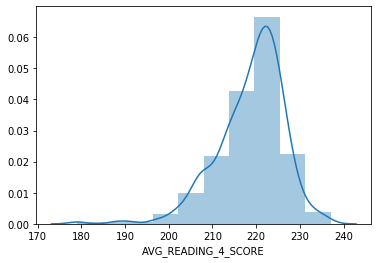

In [9]:
sns.distplot(df[target], bins=10, label='AVG 4th grade reading score distribution')

**It is useful to see the distribution of the target data. This tells us that the average reading scores among states and years follow a fairly centered but left skewed distribution**

Visualization 2

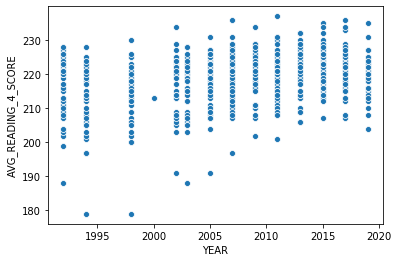

In [11]:
sns.scatterplot(data=df, x='YEAR', y=target)

**Althought it may not be the most important metric, one relationship to look at is the year compared with reading score. This allows us to understand the impact of the year before we even train a model on other, perhaps less obvious features. This graph tells us that the median reading score very very slightly increases in 25 years.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [17]:
from sklearn.model_selection import train_test_split

In [75]:




X = df[features]
y = df[target]
df.head()

,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,AVG_READING_4_SCORE
0,1992,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,207.0
2,1992,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,209.0
3,1992,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,211.0
4,1992,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,202.0
5,1992,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,217.0


In [76]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.1, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [77]:
# import your sklearn class here
from sklearn.svm import LinearSVR

In [78]:
# create your model here
model = LinearSVR()

In [79]:
model.fit(X_train, y_train)

/Users/neel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [89]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
print(y_pred)
print(np.array(y_test))
r2_score(y_test, y_pred)

[ 207.89151634  233.07522913  286.76305994  386.26300369  119.64186251
  198.96188644  150.02261777  348.90334526   82.28620828  -27.40312715
   94.33739008  225.54624464   75.20850823  111.93918772  435.2718986
   90.76665057  427.39711037  245.54020724  123.59146153  675.41752608
  185.06155595  427.95083494  -27.49230079  419.75010155   35.87612201
   86.18227268  127.35796671   46.44988646  159.6135979    69.89073897
  325.30868291  319.35412449  429.01811703  321.71444116  358.35268877
   91.42727099  876.39926909  358.2242339   145.22838152  143.17372882
  236.91501177   54.18245654   79.29948059  146.47173285  334.92168083
  239.9446234   167.80917026  151.416612    -12.85248013 1146.05421896
   67.83682047  232.66560316  242.36791685]
[204. 213. 207. 223. 209. 219. 214. 216. 229. 197. 220. 221. 220. 222.
 231. 225. 218. 224. 228. 217. 221. 218. 221. 212. 213. 225. 219. 226.
 220. 223. 216. 206. 227. 219. 215. 214. 218. 221. 203. 199. 227. 218.
 217. 224. 226. 200. 230. 225. 191

-535.8471144980692

In [81]:
# for classification:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/neel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

Text(0, 0.5, 'AVG_READING_4_SCORE')

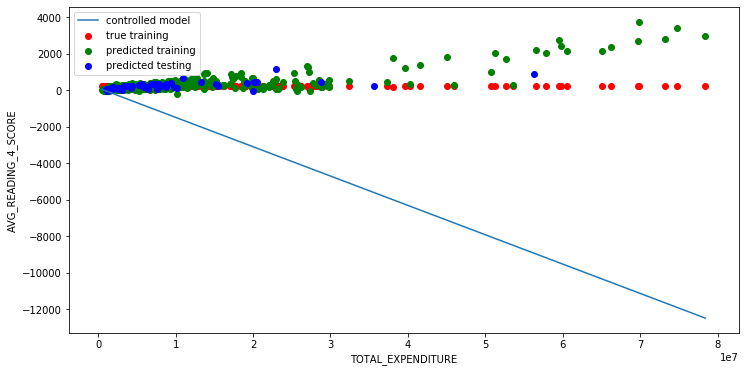

In [84]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'TOTAL_EXPENDITURE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel(target)

<h2> Summary </h2>

**Unfortunately, there is a lot of change that needs to be done before this model is valid. ALthough, the graphs don't look terrible, looking at r2 score and the array of testing predictions, I noticed that some reading scores were predicted in the very negative values (-500). That doesn't even make sense! I think a big reason for this was dropping the NAN values from the training data reduced the dataset 5x! I don't think the model caused any problems; for this type of challenge (regression) a LinearSVR should be sufficient.**